In [2]:
import pandas as pd
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib import gridspec
import matplotlib as mpl
mpl.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = [8.27, 11.69]
# mpl.style.available

In [3]:
Lmin = 2
Lmax = 22
WINDOW_SIZE = 5
PUP_SIZE_SCALE = 0.004
results = join('..', 'results', 'results_review')

# Relational options on correctness

In [4]:
### DATA LOADING
corr_lev_easy = pd.read_csv(join(results, 'dynamics_LEV_EASY_CORR.csv'))
corr_lev_med = pd.read_csv(join(results, 'dynamics_LEV_MED_CORR.csv'))
corr_lev_hard = pd.read_csv(join(results, 'dynamics_LEV_HARD_CORR.csv'))

err_lev_easy = pd.read_csv(join(results, 'dynamics_LEV_EASY_ERR.csv'))
err_lev_med = pd.read_csv(join(results, 'dynamics_LEV_MED_ERR.csv'))
err_lev_hard = pd.read_csv(join(results, 'dynamics_LEV_HARD_ERR.csv'))

full = pd.read_csv(join(results, 'dynamics_FULL.csv'))


ans_type_res = pd.read_csv(join(results, 'LEV_MED_CORR_ans_type_res.csv'))
del ans_type_res['Unnamed: 0']

# Correct trials aggregated over item types
T1 = pd.read_csv(join(results, '1.csv'))
T2 = pd.read_csv(join(results, '2.csv'))
T3 = pd.read_csv(join(results, '3.csv'))
T4 = pd.read_csv(join(results, '4.csv'))
T5 = pd.read_csv(join(results, '5.csv'))
T6 = pd.read_csv(join(results, '6.csv'))
T7 = pd.read_csv(join(results, '7.csv'))

#CORRECTIONS LOADING
CI_corr_lev_easy = pd.read_csv(join(results, 'dynamics_CI_CORR_LEV_EASY.csv'))
CI_corr_lev_med = pd.read_csv(join(results, 'dynamics_CI_CORR_LEV_MED.csv'))
CI_corr_lev_hard = pd.read_csv(join(results, 'dynamics_CI_CORR_LEV_HARD.csv'))

CI_err_lev_easy = pd.read_csv(join(results, 'dynamics_CI_ERR_LEV_EASY.csv'))
CI_err_lev_med = pd.read_csv(join(results, 'dynamics_CI_ERR_LEV_MED.csv'))
CI_err_lev_hard = pd.read_csv(join(results, 'dynamics_CI_ERR_LEV_HARD.csv'))

corr_lev_easy['AVG_RMx'] *= 100
corr_lev_med['AVG_RMx'] *= 100
corr_lev_hard['AVG_RMx'] *= 100
err_lev_easy['AVG_RMx'] *= 100
err_lev_med['AVG_RMx'] *= 100
err_lev_hard['AVG_RMx'] *= 100

full['FOX_aggregated'] *= 100


T1['AVG_RMx'] *= 100
T2['AVG_RMx'] *= 100
T3['AVG_RMx'] *= 100
T4['AVG_RMx'] *= 100
T5['AVG_RMx'] *= 100
T6['AVG_RMx'] *= 100
T7['AVG_RMx'] *= 100

CI_corr_lev_easy['RMx_STD'] *= 100
CI_corr_lev_med['RMx_STD'] *= 100
CI_corr_lev_hard['RMx_STD'] *= 100

CI_err_lev_easy['RMx_STD'] *= 100
CI_err_lev_med['RMx_STD'] *= 100
CI_err_lev_hard['RMx_STD'] *= 100

corr_lev_easy['PROP_PSOx'] /= WINDOW_SIZE
corr_lev_med['PROP_PSOx'] /= WINDOW_SIZE
corr_lev_hard['PROP_PSOx'] /= WINDOW_SIZE

err_lev_easy['PROP_PSOx'] /= WINDOW_SIZE
err_lev_med['PROP_PSOx'] /= WINDOW_SIZE
err_lev_hard['PROP_PSOx'] /= WINDOW_SIZE

corr_lev_easy['PSOx_STD'] /= WINDOW_SIZE
corr_lev_med['PSOx_STD'] /= WINDOW_SIZE
corr_lev_hard['PSOx_STD'] /= WINDOW_SIZE

err_lev_easy['PSOx_STD'] /= WINDOW_SIZE
err_lev_med['PSOx_STD'] /= WINDOW_SIZE
err_lev_hard['PSOx_STD'] /= WINDOW_SIZE

corr_lev_easy['PROP_PSOx'] *= PUP_SIZE_SCALE
corr_lev_med['PROP_PSOx'] *= PUP_SIZE_SCALE
corr_lev_hard['PROP_PSOx'] *= PUP_SIZE_SCALE

err_lev_easy['PROP_PSOx'] *= PUP_SIZE_SCALE
err_lev_med['PROP_PSOx'] *= PUP_SIZE_SCALE
err_lev_hard['PROP_PSOx'] *= PUP_SIZE_SCALE

corr_lev_easy['PSOx_STD'] *= PUP_SIZE_SCALE
corr_lev_med['PSOx_STD'] *= PUP_SIZE_SCALE
corr_lev_hard['PSOx_STD'] *= PUP_SIZE_SCALE

err_lev_easy['PSOx_STD'] *= PUP_SIZE_SCALE
err_lev_med['PSOx_STD'] *= PUP_SIZE_SCALE
err_lev_hard['PSOx_STD'] *= PUP_SIZE_SCALE

In [5]:
def add_CI(data, param, corr = None):
    N = {'PROP_FOx': 'Kx', 'AVG_RMx': 'RMk', 'PROP_PSOx': 'Kx'}[param]
    STD = {'PROP_FOx': 'FOx_STD', 'AVG_RMx': 'RMx_STD', 'PROP_PSOx':'PSOx_STD'}[param]
    if not (corr is None):
        data[param + '_low_CI'] = data[param] - (1.96 * corr[STD] / np.sqrt(corr[N]))
        data[param + '_high_CI'] = data[param] + (1.96 * corr[STD] / np.sqrt(corr[N]))
    else:
        data[param + '_low_CI'] = data[param] - (1.96 * data[STD] / np.sqrt(data[N]))
        data[param + '_high_CI'] = data[param] + (1.96 * data[STD] / np.sqrt(data[N]))

In [6]:
add_CI(corr_lev_easy, 'AVG_RMx', corr = CI_corr_lev_easy)
add_CI(err_lev_easy,'AVG_RMx', corr = CI_err_lev_easy)
add_CI(corr_lev_med, 'AVG_RMx', corr = CI_corr_lev_med)
add_CI(err_lev_med,'AVG_RMx', corr = CI_err_lev_med)
add_CI(corr_lev_hard, 'AVG_RMx', corr = CI_corr_lev_hard)
add_CI(err_lev_hard,'AVG_RMx', corr = CI_err_lev_hard)

In [7]:
full_lev_easy.columns

NameError: name 'full_lev_easy' is not defined

<IPython.core.display.Javascript object>


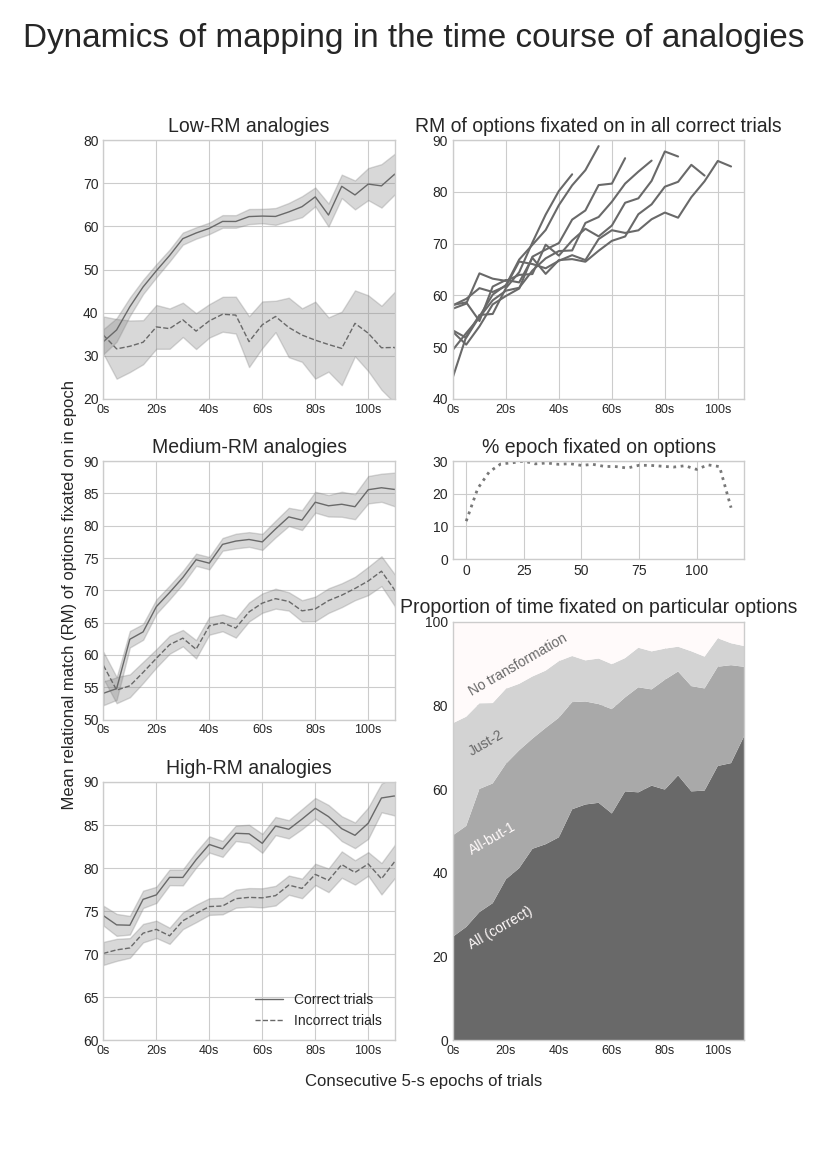

In [45]:
x_ticks = np.arange(0, (WINDOW_SIZE * corr_lev_easy.shape[0]), WINDOW_SIZE)
# Define a function for the line plot with intervals
gs = gridspec.GridSpec(17, 2)

f = plt.figure()
f.tight_layout()
# f, axes = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=False)

# ax1 = axes[0, 0]
# ax2 = axes[1, 0]
# ax3 = axes[2, 0]
# ax4 = axes[0, 1]
# ax5 = axes[1, 1]
# Plot the data, set the linewidth, color and transparency of the
# line, provide a label for the legend

ax1 = plt.subplot(gs[0:5, 0])
ax1.plot(
    x_ticks,
    corr_lev_easy['AVG_RMx'],
    lw=1,
    color='dimgray',
    label='Correct trials')
# Shade the confidence interval
ax1.fill_between(
    x_ticks,
    corr_lev_easy['AVG_RMx_low_CI'],
    corr_lev_easy['AVG_RMx_high_CI'],
    color='gray',
    alpha=0.3)

ax1.plot(
    x_ticks,
    err_lev_easy['AVG_RMx'],
    '--',
    lw=1,
    color='dimgray',
    label='Incorrect trials')
# Shade the confidence interval
ax1.fill_between(
    x_ticks,
    err_lev_easy['AVG_RMx_low_CI'],
    err_lev_easy['AVG_RMx_high_CI'],
    color='gray',
    alpha=0.3)
ax2 = plt.subplot(gs[6:11, 0])
ax2.plot(
    x_ticks,
    corr_lev_med['AVG_RMx'],
    lw=1,
    color='dimgray',
    label='Correct trials')
# Shade the confidence interval
ax2.fill_between(
    x_ticks,
    corr_lev_med['AVG_RMx_low_CI'],
    corr_lev_med['AVG_RMx_high_CI'],
    color='gray',
    alpha=0.3)

ax2.plot(
    x_ticks,
    err_lev_med['AVG_RMx'],
    '--',
    lw=1,
    color='dimgray',
    label='Incorrect trials')
# Shade the confidence interval
ax2.fill_between(
    x_ticks,
    err_lev_med['AVG_RMx_low_CI'],
    err_lev_med['AVG_RMx_high_CI'],
    color='gray',
    alpha=0.3)

# Plot the data, set the linewidth, color and transparency of the
# line, provide a label for the legend
ax3 = plt.subplot(gs[12:17, 0])
ax3.plot(
    x_ticks,
    corr_lev_hard['AVG_RMx'],
    lw=1,
    color='dimgray',
    label='Correct trials')
# Shade the confidence interval
ax3.fill_between(
    x_ticks,
    corr_lev_hard['AVG_RMx_low_CI'],
    corr_lev_hard['AVG_RMx_high_CI'],
    color='gray',
    alpha=0.3)

ax3.plot(
    x_ticks,
    err_lev_hard['AVG_RMx'],
    '--',
    lw=1,
    color='dimgray',
    label='Incorrect trials')
# Shade the confidence interval
ax3.fill_between(
    x_ticks,
    err_lev_hard['AVG_RMx_low_CI'],
    err_lev_hard['AVG_RMx_high_CI'],
    color='gray',
    alpha=0.3)
ax4 = plt.subplot(gs[0:5, 1])

ax4.plot(x_ticks, T1['AVG_RMx'].tolist(), lw=1.5, color='dimgray')
ax4.plot(x_ticks, T2['AVG_RMx'].tolist(), lw=1.5, color='dimgray')
ax4.plot(x_ticks, T3['AVG_RMx'].tolist(), lw=1.5, color='dimgray')
ax4.plot(x_ticks, T4['AVG_RMx'].tolist(), lw=1.5, color='dimgray')
ax4.plot(x_ticks, T5['AVG_RMx'].tolist(), lw=1.5, color='dimgray')
ax4.plot(x_ticks, T6['AVG_RMx'].tolist(), lw=1.5, color='dimgray')
ax4.plot(x_ticks, T7['AVG_RMx'].tolist(), lw=1.5, color='dimgray')

ax5 = plt.subplot(gs[6:8, 1])
ax5.plot(
    x_ticks,
    full['FOX_aggregated'],
    ':',
    lw=2,
    color='dimgray',
    alpha=0.9,
    label='Relative time on options')

color_map = ["dimgray", "darkgrey", "lightgray", "snow"]
ax6 = plt.subplot(gs[9:17, 1])
ax6.stackplot(
    x_ticks,
    ans_type_res['CORR'],
    ans_type_res['SE'],
    ans_type_res['BE'],
    ans_type_res['CON'],
    labels=['CORR', 'SE', 'BE', 'CON'],
    colors=color_map)
ax6.margins(0.0)

# Label the axes and provide a title
ax1.set_title('Low-RM analogies', size=14)

ax2.set_title('Medium-RM analogies', size=14)
ax2.set_ylabel(
    '    Mean relational match (RM) of options fixated on in epoch      ', {
        'size': 12,
        'fontstretch': 'ultra-expanded'
    })

ax3.set_title('High-RM analogies', size=14)

ax4.set_title('RM of options fixated on in all correct trials', size=14)

ax5.set_title('% epoch fixated on options', size=14)

ax6.set_title("Proportion of time fixated on particular options", size=14)
ax6.set_xlabel('Consecutive 5-s epochs of trials', {'size': 12})
ax6.xaxis.set_label_coords(-0.1, -0.08)
ax6.yaxis.labelpad = 15
ax6.yaxis.set_label_position("right")

ax6.text(5, 95, 'No transformation', color='dimgray', rotation=30)
ax6.text(5, 72, 'Just-2', color='dimgray', rotation=30)
ax6.text(5, 50, 'All-but-1', color='snow', rotation=30)
ax6.text(5, 30, 'All (correct)', color='snow', rotation=30)

ax1.tick_params(labelsize=10)
ax6.tick_params(labelsize=10)
ax1.set_xticks(range(0, 111, 20))
ax1.set_xticklabels(['0s', '20s', '40s', '60s', '80s', '100s'], size=9)
ax2.set_xticks(range(0, 111, 20))
ax2.set_xticklabels(['0s', '20s', '40s', '60s', '80s', '100s'], size=9)
ax3.set_xticks(range(0, 111, 20))
ax3.set_xticklabels(['0s', '20s', '40s', '60s', '80s', '100s'], size=9)

ax4.set_xticks(range(0, 111, 20))
ax4.set_xticklabels(['0s', '20s', '40s', '60s', '80s', '100s'], size=9)

ax6.set_xticks(range(0, 111, 20))
ax6.set_xticklabels(['0s', '20s', '40s', '60s', '80s', '100s'], size=9)

ax1.set_xlim([0, 110])
ax2.set_xlim([0, 110])
ax3.set_xlim([0, 110])
ax4.set_xlim([0, 110])
ax6.set_xlim([0, 110])

ax1.set_ylim([20, 80])
ax2.set_ylim([50, 90])
ax3.set_ylim([60, 90])
ax4.set_ylim([40, 90])
ax5.set_ylim([0, 30])
ax6.set_ylim([0, 100])

# Display legend
# ax1.legend(loc='upper left', fontsize=10)
# ax2.legend(loc='upper left', fontsize=10)
ax3.legend(loc='lower right', fontsize=10)

f.suptitle('Dynamics of mapping in the time course of analogies', size=24)
# ax1.legend(loc = 'best')
f.savefig('panel_5x1_review.png')